In [2]:
import pandas as pd
import numpy as np

In [176]:
#Things to know about view and copies. This applies to pandas as well.
# `arr` is the original array:
arr = np.array([1, 2, 4, 8, 16, 32])

# `a` and `b` are views created through slicing:
a = arr[1:3]
b = arr[1:4:2]

# `c` and `d` are copies created through integer and Boolean indexing:
c = arr[[1, 3]]
d = arr[[False, True, False, True, False, False]]

## Pandas Object

1. Series - 1D indexed data. 
2. Index - immutable and ordered set.
3. Dataframe - Just like numpy array with higher dimensions but indexed.

In [42]:
#Series

a = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])  #Explicitly declaring index but pandas also declare implicit index also.
print(a,'\n')

print(a.values, '\n')
print(a.index, '\n')
print(list(a.items()), '\n')
print(a[0]) #Implicit index
print(a['a']) #Explicit index

#To remove the confusion btw implicit nd explicit we use attributes 'loc', 'iloc'
print(a.loc['a']) #Explicit index
print(a.iloc[0]) #Implicit index access

a    1
b    2
c    3
d    4
e    5
dtype: int64 

[1 2 3 4 5] 

Index(['a', 'b', 'c', 'd', 'e'], dtype='object') 

[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5)] 

1
1
1
1


In [25]:
#Index
b = pd.Index([1, 2, 3, 4, 5])
print(b, '\n')
print(b.values,'\n')
print(b[0])

Int64Index([1, 2, 3, 4, 5], dtype='int64') 

[1 2 3 4 5] 

1


In [41]:
#DataFrame
c = pd.DataFrame({'No': a, 'Value': a})
print(c,'\n')


print(c['No'])  # In Dataframe indexing return columns 
print(c['No'])
print(c.values, '\n')
print(c.index, '\n')
print(c.columns)

#To index like array we use 'loc', 'iloc' which access the underlaying array in Dataframe just like numpy array
print(c.loc['a', 'No']) #Explicit index
print(c.iloc[0, 1]) #Implicit index access

   No  Value
a   1      1
b   2      2
c   3      3
d   4      4
e   5      5 

a    1
b    2
c    3
d    4
e    5
Name: No, dtype: int64
a    1
b    2
c    3
d    4
e    5
Name: No, dtype: int64
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]] 

Index(['a', 'b', 'c', 'd', 'e'], dtype='object') 

Index(['No', 'Value'], dtype='object')
1
1


## Handling Missing Value

1. Python null values: the special floating-point NaN value, and the Python None object.
2. Pandas usually cast the dtype without null values to dtype of NaN or None.

In [52]:
#Type Casting None to NaN
a = pd.Series([1, 2, None, 4])
print(a, '\n')

b = pd.Series(['a', 'b', None, 'c'])
print(b,'\n')

#NaN +/*/- with any number is NaN 
print(1 + np.nan)

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64 

0       a
1       b
2    None
3       c
dtype: object 

nan


In [53]:
x = pd.Series([1, 2, None, 4, 5, 6])
print(x.isnull())

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool


In [54]:
print(x.notnull())

0     True
1     True
2    False
3     True
4     True
5     True
dtype: bool


In [57]:
print(x.dropna())

0    1.0
1    2.0
3    4.0
4    5.0
5    6.0
dtype: float64


In [61]:
print(x.fillna(method = 'bfill'))

0    1.0
1    2.0
2    4.0
3    4.0
4    5.0
5    6.0
dtype: float64


## Hierarchical Indexing

In [62]:
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]

In [63]:
multiind = pd.MultiIndex.from_tuples(index)

In [77]:
x = pd.Series(populations, index = multiind)
print(x)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [74]:
#converting this to dataframe
x = x.unstack()
print(x, '\n')

#Converting back to Series
x = x.stack()
print(x)

                2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561 

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


In [78]:
y = pd.DataFrame({'population': x, 'under18':[9267089, 9284094,
4687374, 4318033,
5906301, 6879014]})
print(y, '\n')
print(y.stack())

                 population  under18
California 2000    33871648  9267089
           2010    37253956  9284094
New York   2000    18976457  4687374
           2010    19378102  4318033
Texas      2000    20851820  5906301
           2010    25145561  6879014 

California  2000  population    33871648
                  under18        9267089
            2010  population    37253956
                  under18        9284094
New York    2000  population    18976457
                  under18        4687374
            2010  population    19378102
                  under18        4318033
Texas       2000  population    20851820
                  under18        5906301
            2010  population    25145561
                  under18        6879014
dtype: int64


In [80]:
#Nameing the index
y.index.names = ['State', 'Year']
y

population  under18
State      Year                     
California 2000    33871648  9267089
           2010    37253956  9284094
New York   2000    18976457  4687374
           2010    19378102  4318033
Texas      2000    20851820  5906301
           2010    25145561  6879014

In [86]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      23.0  36.9  25.0  36.3  37.0  38.6
     2      25.0  37.0  35.0  37.5  51.0  37.4
2014 1      34.0  36.4  33.0  36.6  33.0  36.6
     2      37.0  36.3  41.0  37.2  47.0  39.3

In [91]:
health_data['Bob']

type          HR  Temp
year visit            
2013 1      23.0  36.9
     2      25.0  37.0
2014 1      34.0  36.4
     2      37.0  36.3

In [92]:
health_data['Bob', 'HR']

year  visit
2013  1        23.0
      2        25.0
2014  1        34.0
      2        37.0
Name: (Bob, HR), dtype: float64

In [93]:
health_data.loc[2014, 'Bob']

type,HR,Temp
visit,,
1,34.0,36.4
2,37.0,36.3


In [94]:
health_data.loc[2014, ('Bob', 'HR')]

visit
1    34.0
2    37.0
Name: (Bob, HR), dtype: float64

In [96]:
health_data.loc[(2014, 1), ('Bob', 'HR')]

34.0

In [97]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,23.0,25.0,37.0
2014,1,34.0,33.0,33.0


In [99]:
# We can slice the element only when the index is sorted.
x['California':'New York']

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [112]:
x = pd.Series(np.random.rand(4), index=[['b', 'b', 'a', 'a'],[1, 2, 1, 2]])
x

b  1    0.593355
   2    0.540626
a  1    0.754532
   2    0.551343
dtype: float64

In [116]:
#Here for series 'a' the index is not sorted. So we can not slice
x = x.sort_index()
x['a':'b']

a  1    0.754532
   2    0.551343
b  1    0.593355
   2    0.540626
dtype: float64

In [119]:
x.mean(level = 1)

1    0.673943
2    0.545985
dtype: float64

In [120]:
x.max(level = 1)

1    0.754532
2    0.551343
dtype: float64

## Concat and Append

In [127]:
# pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
# keys=None, levels=None, names=None, verify_integrity=False,
# copy=True)

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
print(pd.concat([ser1, ser2]))

#Append
print(ser1.append(ser2))

#Concat is more efficient than Append

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object
1    A
2    B
3    C
4    D
5    E
6    F
dtype: object


## More powerful and database style in-memory join,merge - pd.merge

In [138]:
#pd.merge(Obj, on="", left_on="", right_on="", left_index="",right_index="")

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [132]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [136]:
# One-to-One-Type
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1, '\n'); print(df2, '\n')
print(pd.merge(df1, df2))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014 

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [135]:
# Many-to-One-type
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3, '\n'); print(df4, '\n'); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014 

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve 

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [137]:
# Many-to-Many
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
print(df1, '\n'); print(df5, '\n'); 
print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization 

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Example

In [184]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head())
print(areas.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [185]:
merged = pd.merge(pop, abbrevs, how='outer',
left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [186]:
merged.count()

state/region    2544
ages            2544
year            2544
population      2524
state           2448
dtype: int64

In [187]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [188]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [189]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [190]:
final.loc[final['area (sq. mi)'].isnull(), 'state'].unique()

array(['United States'], dtype=object)

In [194]:
final.dropna(inplace = True)

In [196]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [197]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [198]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregration

In [4]:
df = pd.DataFrame({'A': np.random.random(5),'B': np.random.random(5)})
df

,A,B
0,0.560602,0.400920
1,0.941542,0.721185
2,0.013683,0.039439
3,0.206825,0.395570
4,0.984214,0.661135


In [5]:
df.sum()

A    2.706866
B    2.218249
dtype: float64

In [7]:
df.mean(axis=1)

0    0.480761
1    0.831363
2    0.026561
3    0.301197
4    0.822675
dtype: float64

In [8]:
df.describe()

,A,B
count,5.000000,5.000000
mean,0.541373,0.443650
std,0.432144,0.270115
min,0.013683,0.039439
25%,0.206825,0.395570
50%,0.560602,0.400920
75%,0.941542,0.661135
max,0.984214,0.721185


## Groupby

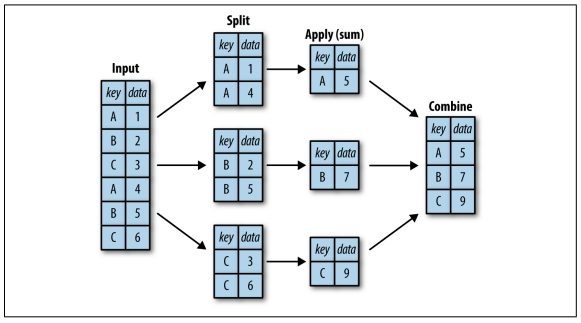

In [9]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [10]:
df.groupby('key')

In [11]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### Aggregrate, filter and transform


In [12]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [23]:
# Aggregrate
df.groupby('key').aggregate(['min', np.median, max])

In [27]:
#Filter - take dataframe or series and give boolean output.
def filter_func(x):
    return x['data2'].std() > 4
print(df); 
print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [28]:
# Transformation
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [30]:
# Apply - same as transformation
def norm_by_data2(x):
# x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9
